# Supervised Learning - Foundations Project: ReCell 

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handataul of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [1]:
%load_ext nb_black

# To filter the warnings
import warnings

warnings.filterwarnings("ignore")

# data manipulation libraries
import numpy as np
import pandas as pd 

# data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# ML Libraries
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

# for model evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# for building linear regression_model
import statsmodels.api as sm

# for Variance Inflation Factor Calculation
from statsmodels.stats.outliers_influence import variance_inflation_factor

<IPython.core.display.Javascript object>

## Loading the dataset

In [2]:
# reading the csv file into a dataframe
data = pd.read_csv("used_device_data.csv")


<IPython.core.display.Javascript object>

## Data Overview

- Observations
- Sanity checks

In [3]:
# printing the first 5 rows of the dataset
data.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


<IPython.core.display.Javascript object>

In [4]:
# Checking the shape of the data
data.shape

(3454, 15)

<IPython.core.display.Javascript object>

- There are 3454 rows and 15 columns in our dataset

In [5]:
# checking column types and number of values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

<IPython.core.display.Javascript object>

* Most of the columns in the data are numeric in nature ('int64' or 'float64' type).
* The brand_name, os, 4g and 5g columns are categorical ('object' type).

In [6]:
# checking Statistical summary of the dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
screen_size,3454.0,13.713115,3.805280,5.080000,12.700000,12.830000,15.340000,30.710000
main_camera_mp,3275.0,9.460208,4.815461,0.080000,5.000000,8.000000,13.000000,48.000000
selfie_camera_mp,3452.0,6.554229,6.970372,0.000000,2.000000,5.000000,8.000000,32.000000
int_memory,3450.0,54.573099,84.972371,0.010000,16.000000,32.000000,64.000000,1024.000000
ram,3450.0,4.036122,1.365105,0.020000,4.000000,4.000000,4.000000,12.000000
battery,3448.0,3133.402697,1299.682844,500.000000,2100.000000,3000.000000,4000.000000,9720.000000
weight,3447.0,182.751871,88.413228,69.000000,142.000000,160.000000,185.000000,855.000000
release_year,3454.0,2015.965258,2.298455,2013.000000,2014.000000,2015.500000,2018.000000,2020.000000
days_used,3454.0,674.869716,248.580166,91.000000,533.500000,690.500000,868.750000,1094.000000
normalized_used_price,3454.0,4.364712,0.588914,1.536867,4.033931,4.405133,4.755700,6.619433


<IPython.core.display.Javascript object>

In [7]:
# checking for duplicate data
data.duplicated().sum()

0

<IPython.core.display.Javascript object>

- There are no duplicate values

In [8]:
# Checking for missing data
data.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

<IPython.core.display.Javascript object>

The following columns have missing data
- main_camera_mp
- selfie_camera_mp
- int_memory
- ram
- battery
- weight

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

### Univariate Analysis

In [9]:
# Function fot plotting histogram and boxplot together


def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):

    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [10]:
# Function for Barplot
def labeled_barplot(data, feature, perc=False, n=None):

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

##### Histogram and Boxplot of screen_size

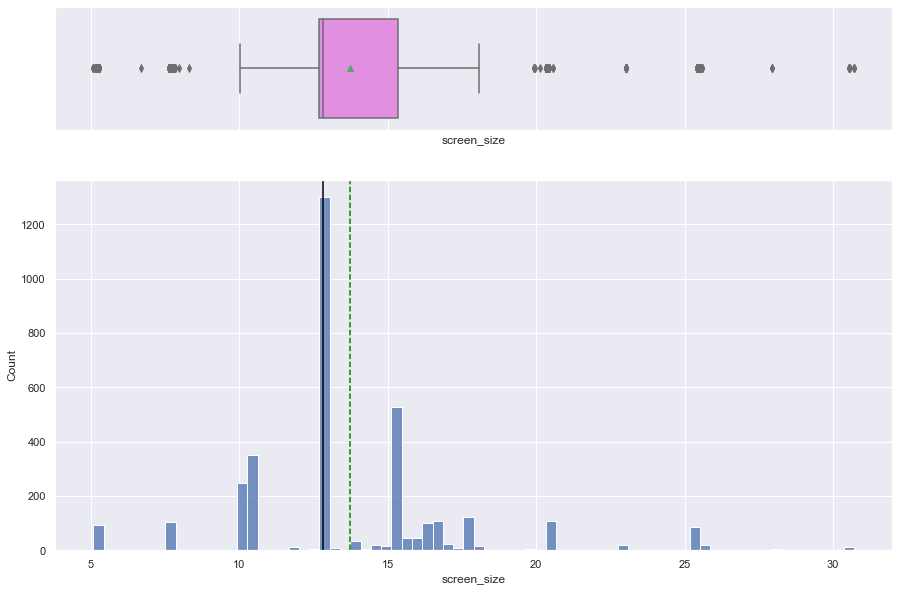

<IPython.core.display.Javascript object>

In [11]:
histogram_boxplot(data, "screen_size")

##### Histogram and Boxplot of main_camera_mp

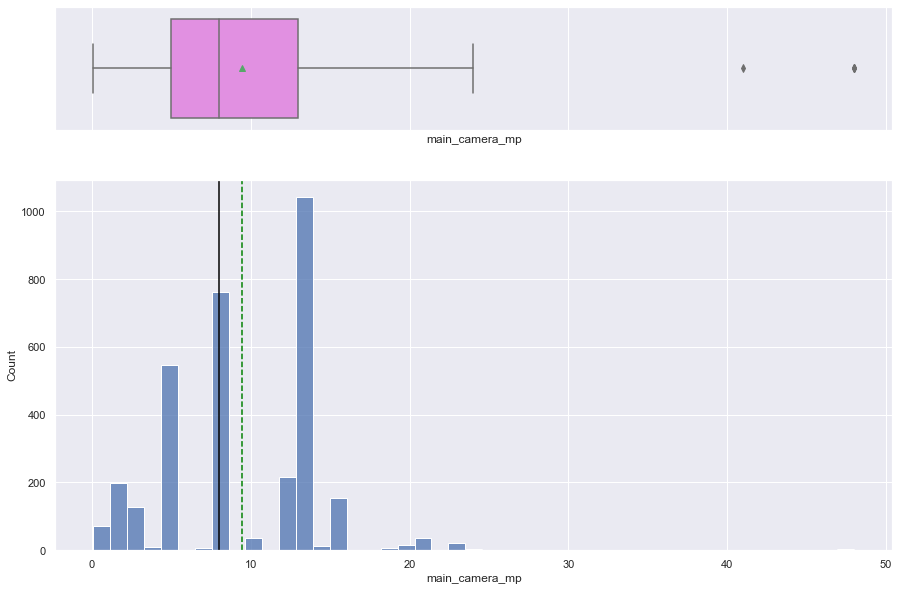

<IPython.core.display.Javascript object>

In [12]:
histogram_boxplot(data, "main_camera_mp")

##### Histogram and Boxplot of selfie_camera_mp

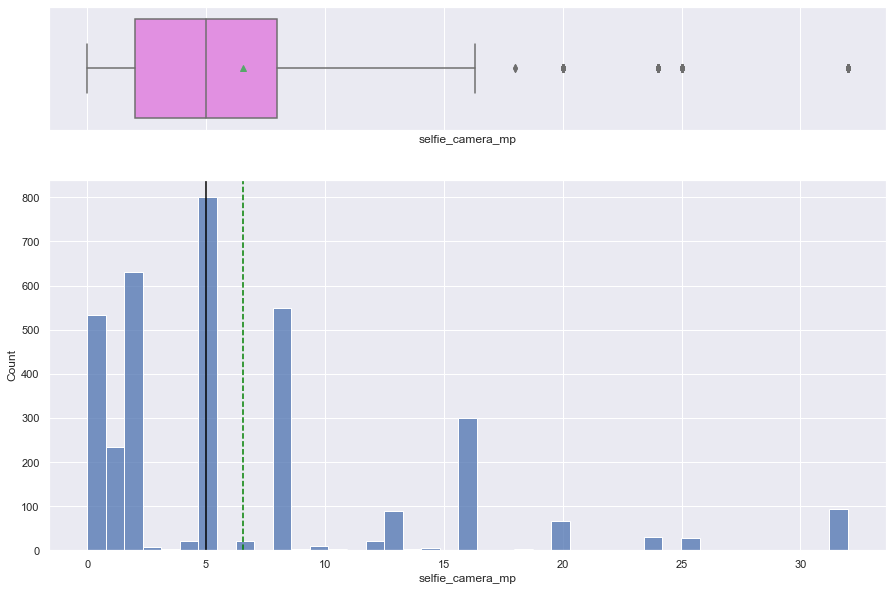

<IPython.core.display.Javascript object>

In [13]:
histogram_boxplot(data, "selfie_camera_mp")

##### Histogram and Boxplot of int_memory

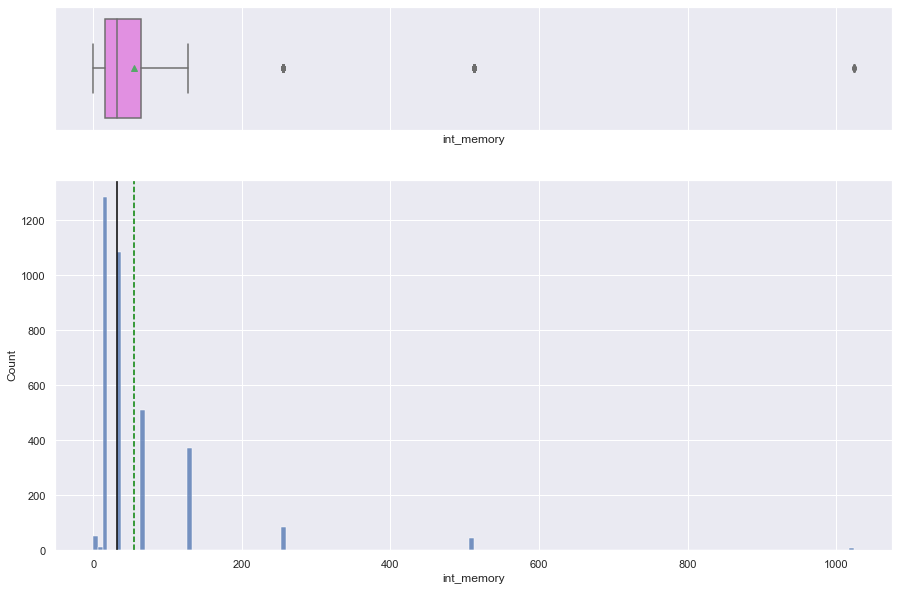

<IPython.core.display.Javascript object>

In [14]:
histogram_boxplot(data, "int_memory")

##### Histogram and Boxplot of ram

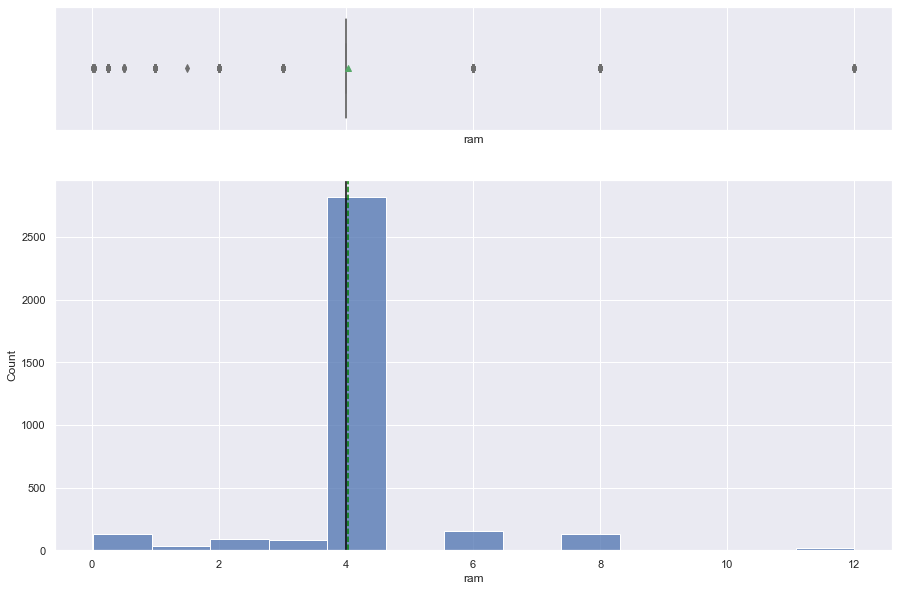

<IPython.core.display.Javascript object>

In [15]:
histogram_boxplot(data, "ram")

##### Histogram and Boxplot of battery

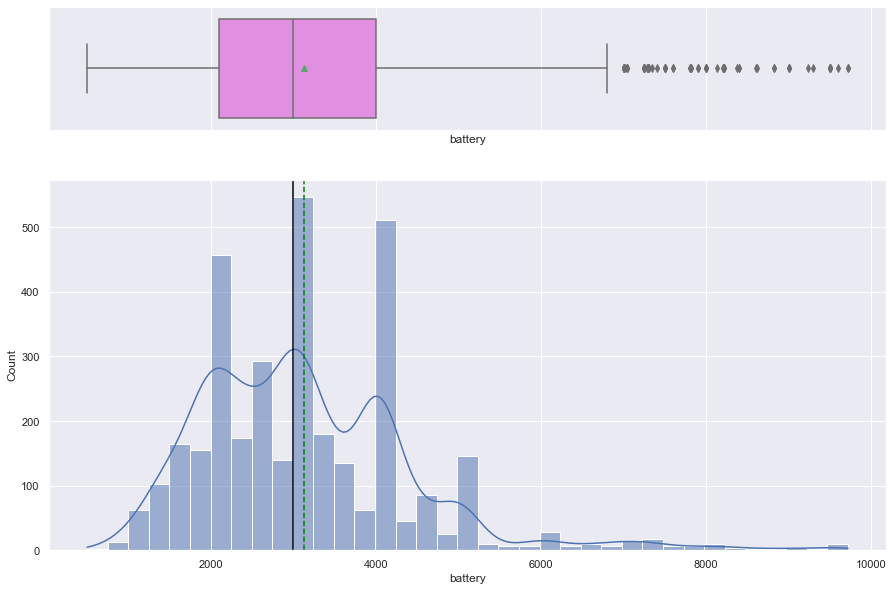

<IPython.core.display.Javascript object>

In [16]:
histogram_boxplot(data, "battery", kde=True)

##### Histogram and Boxplot of weight

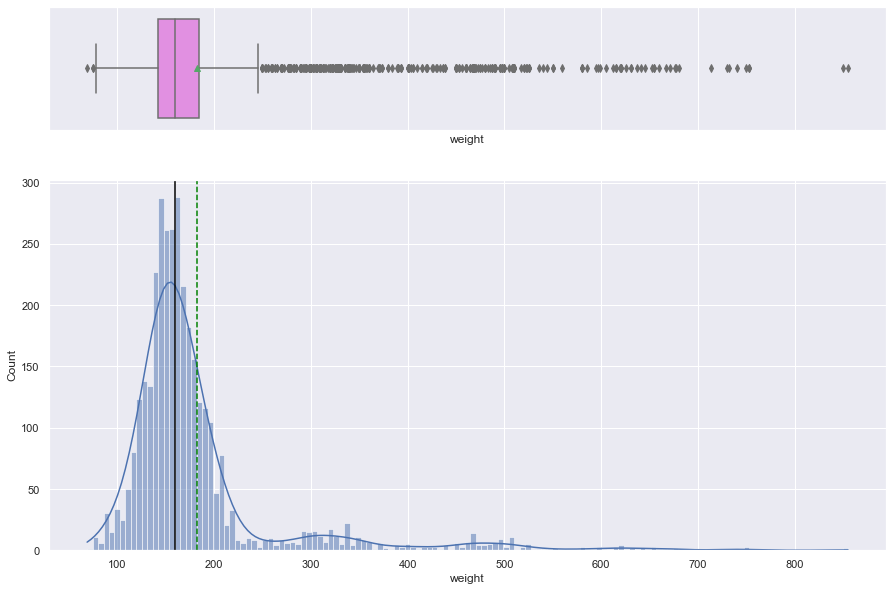

<IPython.core.display.Javascript object>

In [17]:
histogram_boxplot(data, "weight", kde=True)

##### Histogram and Boxplot of days_used

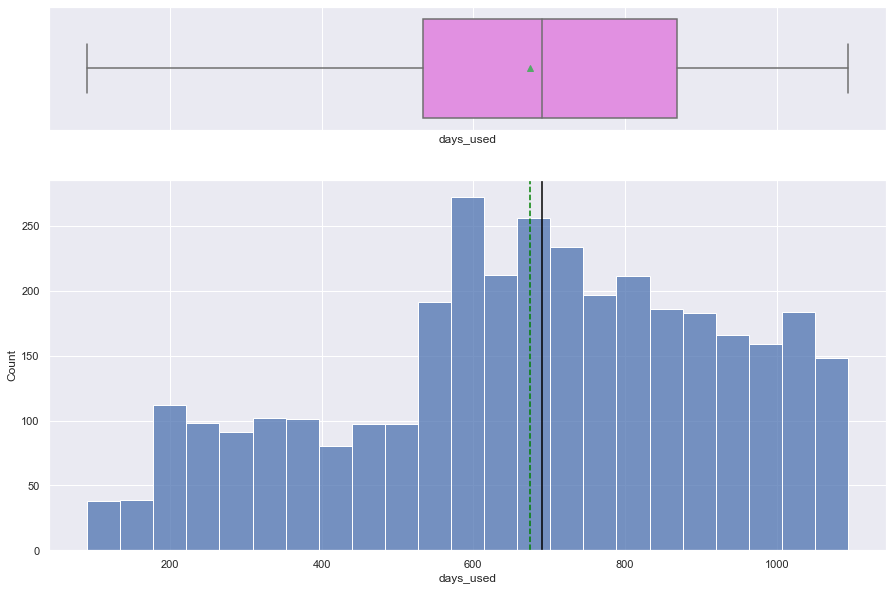

<IPython.core.display.Javascript object>

In [18]:
histogram_boxplot(data, "days_used")

##### Histogram and Boxplot of normalized_used_price

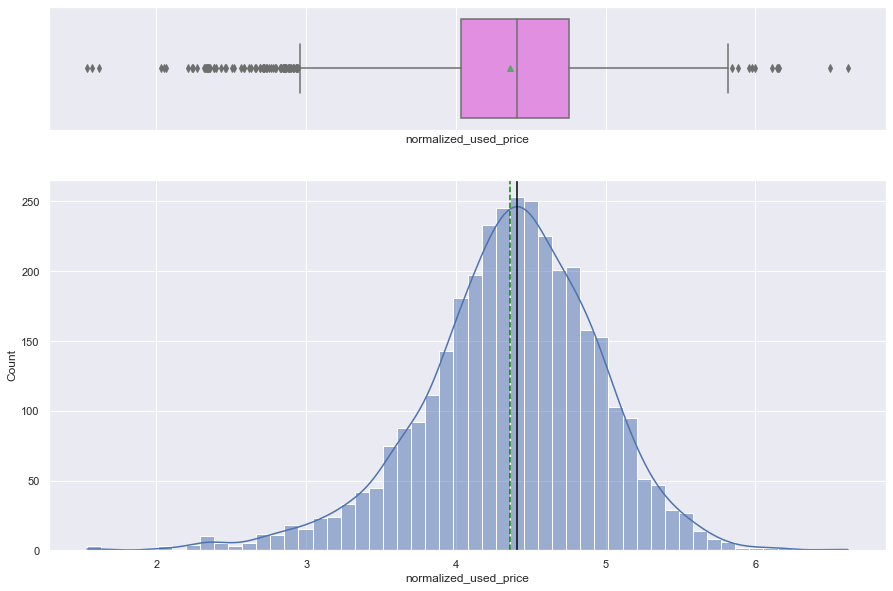

<IPython.core.display.Javascript object>

In [19]:
histogram_boxplot(data, "normalized_used_price", kde=True)

##### Histogram and Boxplot of normalized_new_price

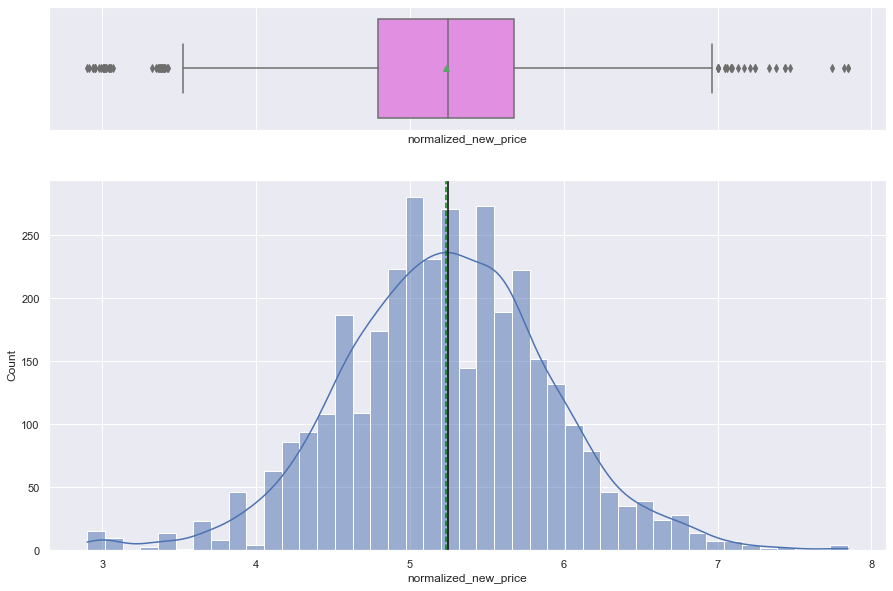

<IPython.core.display.Javascript object>

In [20]:
histogram_boxplot(data, "normalized_new_price", kde=True)

##### Barplot of brand_name

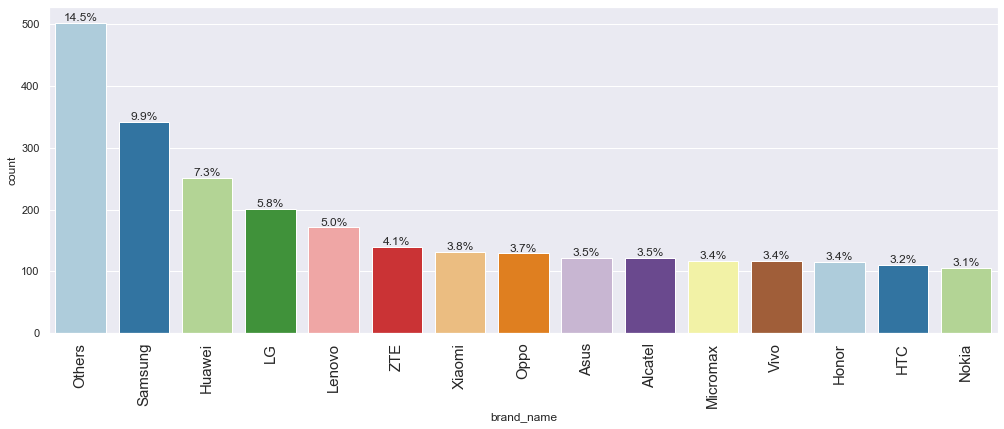

<IPython.core.display.Javascript object>

In [21]:
labeled_barplot(data, "brand_name", perc=True, n=15)

##### Barplot of os

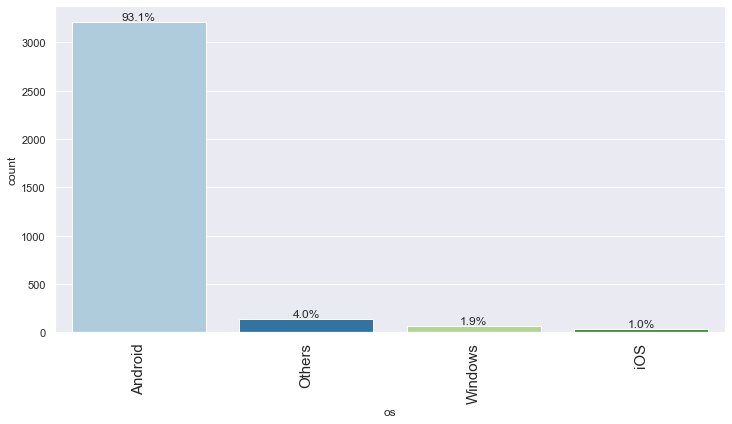

<IPython.core.display.Javascript object>

In [22]:
labeled_barplot(data, "os", perc=True, n=10)

##### Barplot of 4g

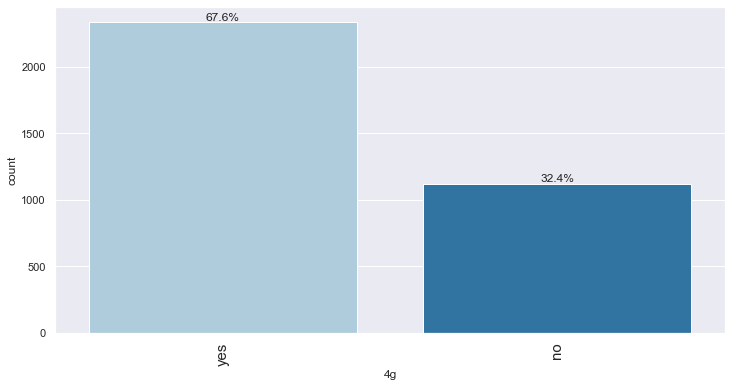

<IPython.core.display.Javascript object>

In [23]:
labeled_barplot(data, "4g", perc=True, n=10)

##### Barplot of 5g

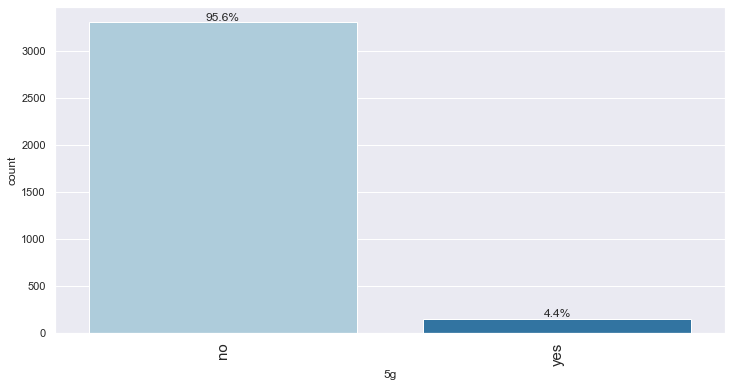

<IPython.core.display.Javascript object>

In [24]:
labeled_barplot(data, "5g", perc=True, n=10)

##### Barplot of release_year

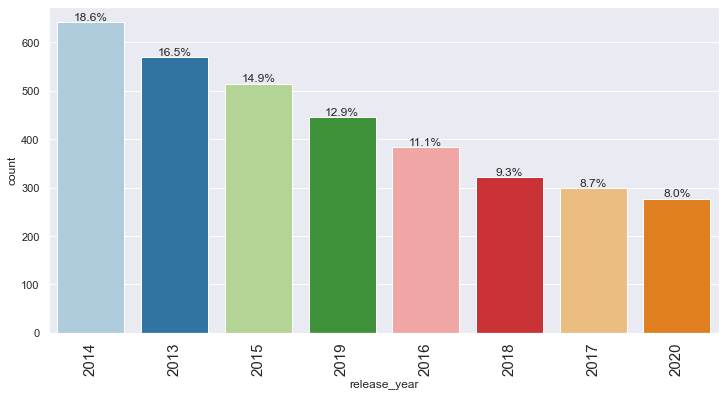

<IPython.core.display.Javascript object>

In [25]:
labeled_barplot(data, "release_year", perc=True, n=10)

#### Conclusion on univariate analysis:

- About 50% of the devices has front camera resolution between 2 megapixel and 8 mega pixel with a median value of 5 megapixel
- About 50% of the devices has rear camera resolution between 5 megapixel and 13 mega pixel with a median value of 8 megapixel
- Almost half of the devices batteries are less than 3000mAh.
- The average RAM of the devices is 4GB
- The average weight of the devices is 182.8 grams
- about 50% of the devices has front camera resolution between 142grams and 185grams 
- The distribution of the normalized_new_price column is close to a normal distribution except for the left tail
- The distribution of the normalized_used_price column is close to a normal distribution
- About 93.1% of the devises have Android operating system
- 67.6% of devices in the data has 4g
- Only 4.4% of devices in the dataset has 5g
- The majority of the devices 18.6% ere released in 2014

### Bivariate Analysis

#### Plotting a heatmap of the numerical columns

In [26]:
# creating a list of numerical columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()

# dropping release_year  from list of numerical columns as they are not numerical in nature
num_cols.remove("release_year")


<IPython.core.display.Javascript object>

In [27]:
num_cols

['screen_size',
 'main_camera_mp',
 'selfie_camera_mp',
 'int_memory',
 'ram',
 'battery',
 'weight',
 'days_used',
 'normalized_used_price',
 'normalized_new_price']

<IPython.core.display.Javascript object>

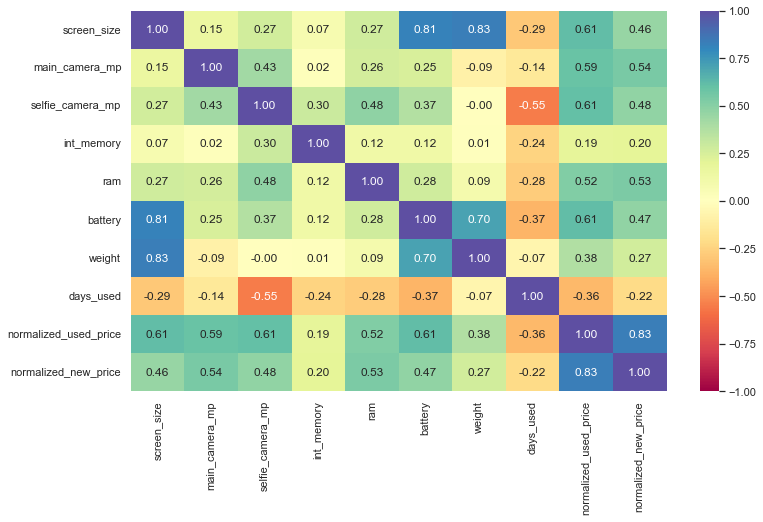

<IPython.core.display.Javascript object>

In [28]:
# This heatmap answers the question: Which attributes are highly correlated with the normalized price of a used device?
plt.figure(figsize=(12, 7))
sns.heatmap(
    data[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

#### Plotting a pair plot of the numerical columns

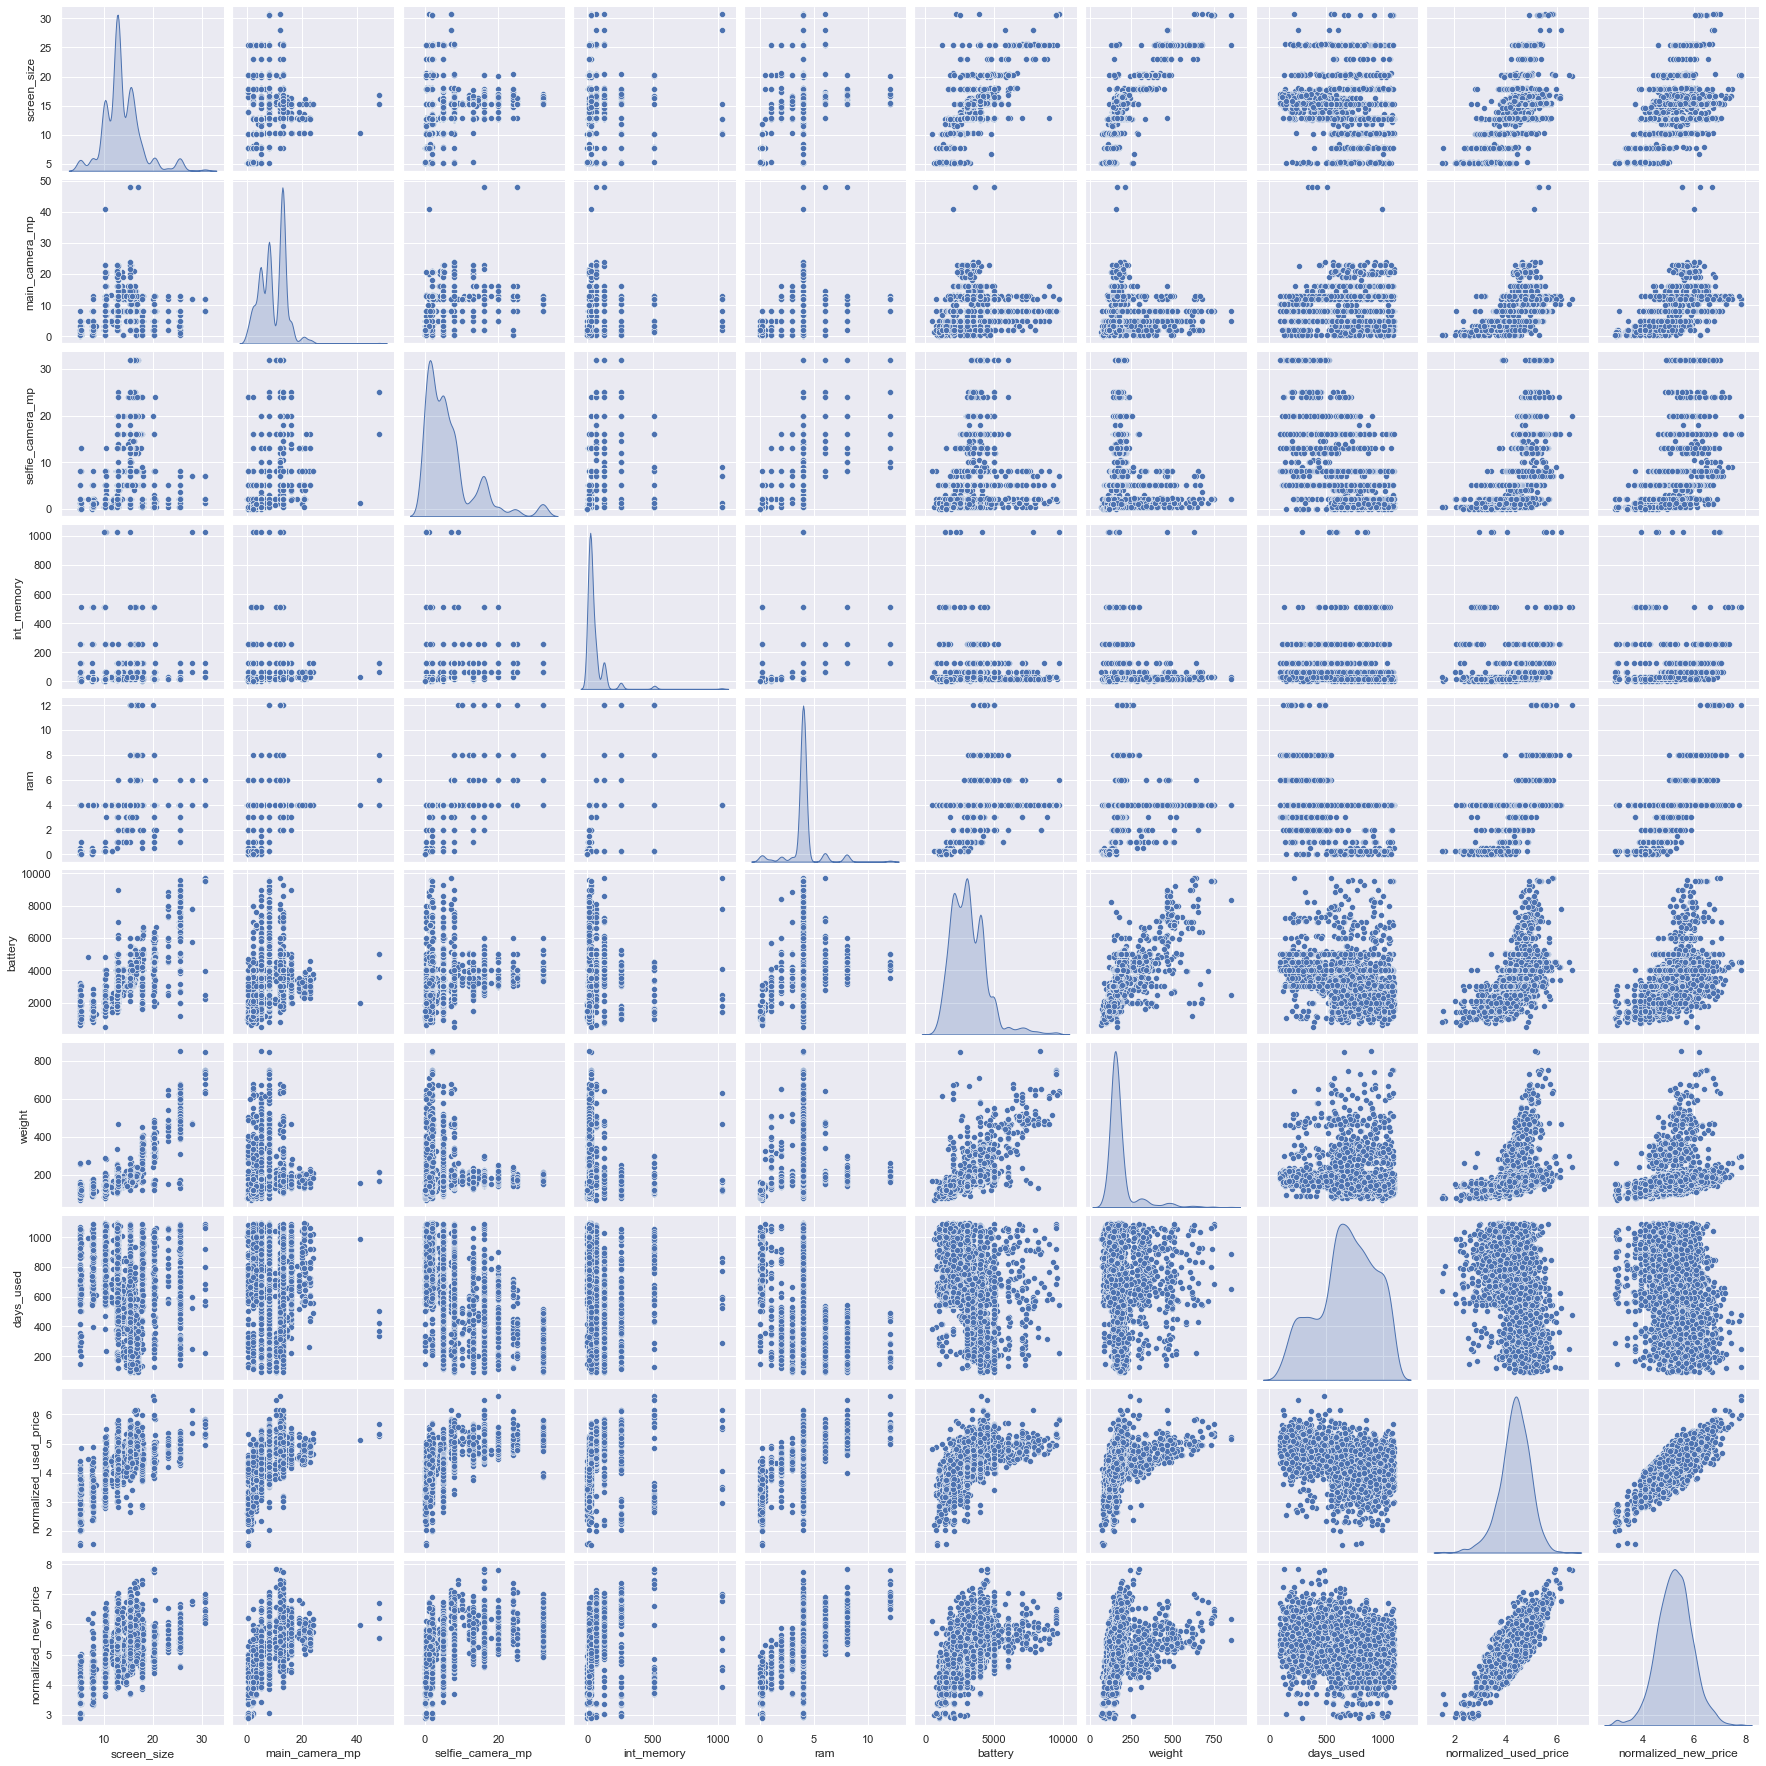

<IPython.core.display.Javascript object>

In [29]:
sns.pairplot(data[num_cols], diag_kind="kde")

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

#### Boxplot of RAM vs Brand Name

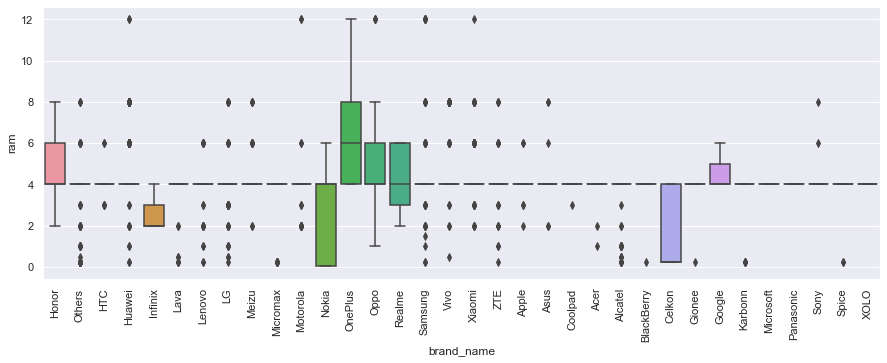

<IPython.core.display.Javascript object>

In [30]:
# This answers the uestion : How does the amount of RAM vary with the brand?

plt.figure(figsize=(15, 5))
sns.boxplot(data=data, x="brand_name", y="ram")
plt.xticks(rotation=90)
plt.show()

#### Boxplot of brand_name vs weight for devices with large batteries only

The dataset with large batteries has 341 rows and 15 columns


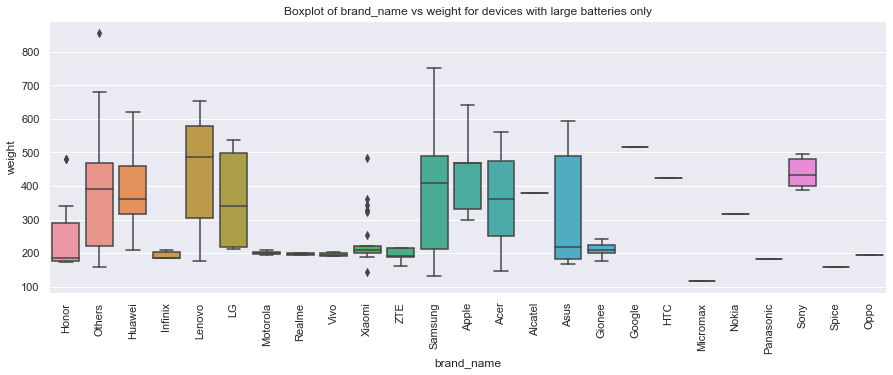

<IPython.core.display.Javascript object>

In [31]:
# This answers the question:  How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?

# First we extract the data with large batteries
filter_ = data["battery"] > 4500
largeBatterydata = data[filter_]
print(
    "The dataset with large batteries has {0} rows and {1} columns".format(
        largeBatterydata.shape[0], largeBatterydata.shape[1]
    )
)

# Second weplot the boxplot
plt.figure(figsize=(15, 5))
sns.boxplot(data=largeBatterydata, x="brand_name", y="weight")
plt.title("Boxplot of brand_name vs weight for devices with large batteries only")
plt.xticks(rotation=90)
plt.show()

#### Barplot of brand_name with large screen size > 6 inches

The dataset with large screen_size has 1099 rows and 15 columns


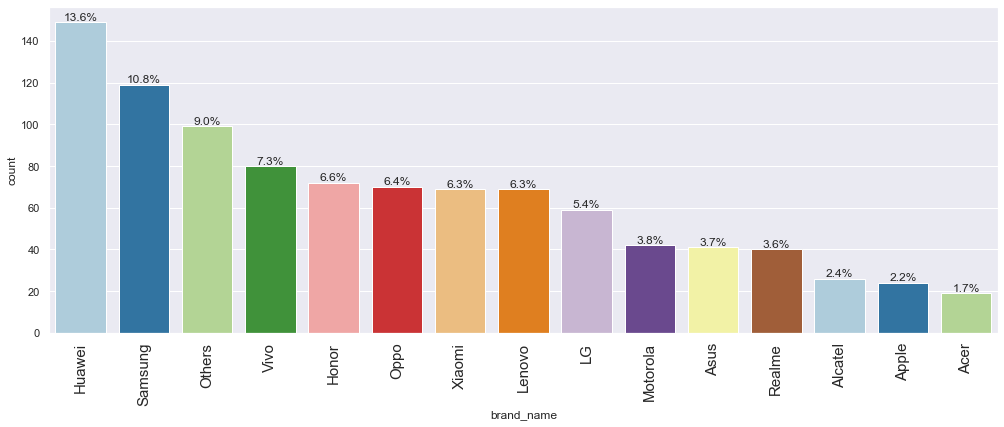

<IPython.core.display.Javascript object>

In [32]:
# This answers the question: How many phones and tablets are available across different brands with a screen size larger than 6 inches?
# from our data, screen size is in centimeter
# to convert 6 inches to cm, multiply by 2.54
filter_ = data['screen_size'] > 6 * 2.54
largeScreendata = data[filter_]
print('The dataset with large screen_size has {0} rows and {1} columns'.format(largeScreendata.shape[0],largeScreendata.shape[1]))

labeled_barplot(largeScreendata, "brand_name", perc=True, n=15)


**Everyone likes a good camera to capture their favorite moments with loved ones. Some customers specifically look for good front cameras to click cool selfies. Let's create a new dataframe of only those devices which are suitable for this customer segment and analyze.**

#### Bar plot of brand_names with high quality selfie camera

The dataset with high quality selfie camera has 655 rows and 15 columns


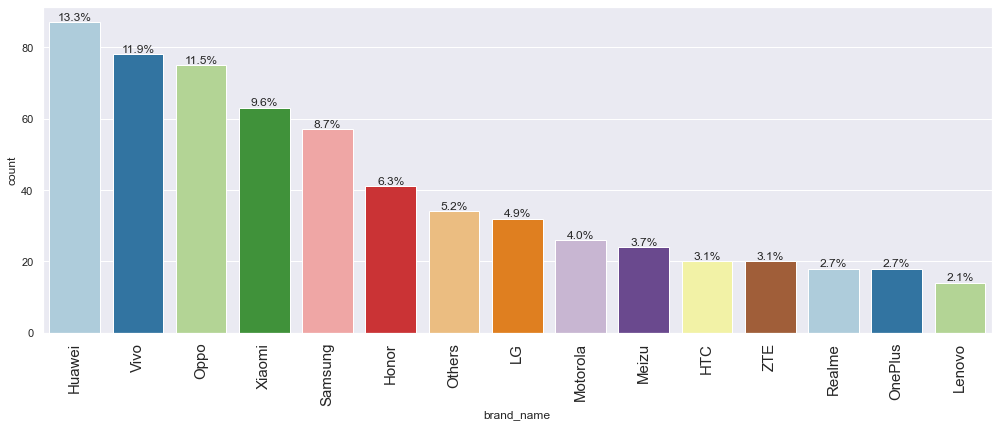

<IPython.core.display.Javascript object>

In [33]:
# This answers the question: What is the distribution of devices offering greater than 8MP selfie cameras across brands?
# First we extract the data with selfie cameras greater than 8MP
filter_ = data["selfie_camera_mp"] > 8
goodSelfieCamdata = data[filter_]
print(
    "The dataset with high quality selfie camera has {0} rows and {1} columns".format(
        goodSelfieCamdata.shape[0], goodSelfieCamdata.shape[1]
    )
)

# Second weplot the boxplot
labeled_barplot(goodSelfieCamdata, "brand_name", perc=True, n=15)

#### Bar plot of brand_names with high quality main camera

The dataset with high quality selfie camera has 94 rows and 15 columns


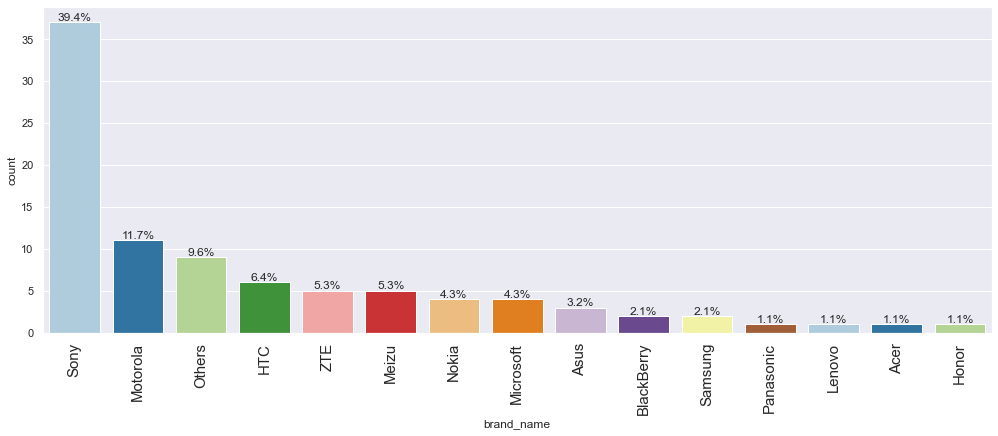

<IPython.core.display.Javascript object>

In [34]:
# This answers the question: What is the distribution of devices offering greater than 8MP main cameras across brands?
# First we extract the data with main cameras greater than 16MP
filter_ = data["main_camera_mp"] > 16
goodMainCamdata = data[filter_]
print(
    "The dataset with high quality selfie camera has {0} rows and {1} columns".format(
        goodMainCamdata.shape[0], goodMainCamdata.shape[1]
    )
)

# Second weplot the boxplot
labeled_barplot(goodMainCamdata, "brand_name", perc=True, n=15)

#### Line plot of release year and used price

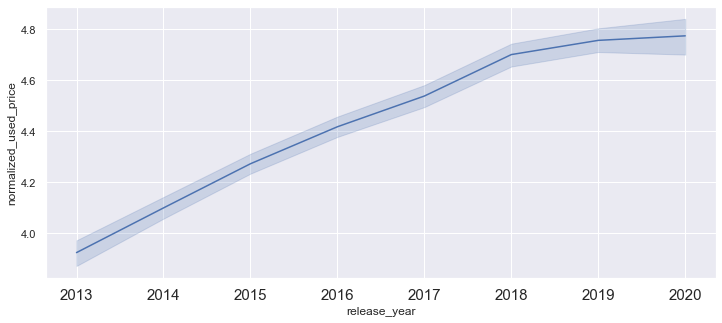

<IPython.core.display.Javascript object>

In [35]:
# this answers the question: how does the price of used devices varies across the years.
plt.figure(figsize=(12, 5))
sns.lineplot(data=data, x="release_year", y="normalized_used_price")
plt.xticks(fontsize=15)
plt.show()

#### Boxplot of 4g and 5g with used prices

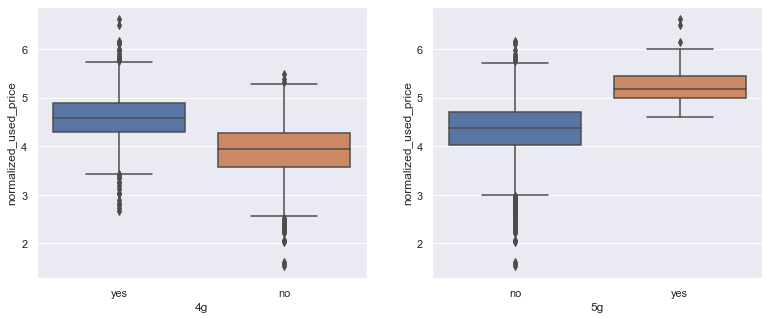

<IPython.core.display.Javascript object>

In [36]:
# This answers the question: How does the prices vary for used phones and tablets offering 4G and 5G networks.
plt.figure(figsize=(13, 5))

plt.subplot(121)
sns.boxplot(data=data, x="4g", y="normalized_used_price")

plt.subplot(122)
sns.boxplot(data=data, x="5g", y="normalized_used_price")

plt.show()

In [37]:
data.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


<IPython.core.display.Javascript object>

#### Conclusion on bivariate analysis:

- The battery, RAM, front camera, rear camera, normalized_new_price, and screen size all have strong correlation with normalized_used_price 
- There is a strong positive correlation (0.81) between battery and the screen size
- There is a strong positive correlation(0.83) between weight and the screen size
- The Samsung brands have the highest weight
- The Huawei brands have the highest number of large screen size devices
- The Huawei brands have the highest number of high-quality front camera
- The Sony brands have the highest number of high quality front camera
- The normalized_used_price increases and the release year increases
- Devices with 5g are more expensive than the devises without 5g
- Devices with 4g are more expensive than the devises without 4g

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

##### Treating the missing values

In [38]:
df = data.copy()  # making a copy of my dataset to preserve the original

<IPython.core.display.Javascript object>

In [39]:
# cheicking for missing values again
missing_data = df.isnull().sum()
missing_data

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

<IPython.core.display.Javascript object>

In [40]:
# finding  the columns with the missing values

missing_value_cols = []
for items in missing_data.iteritems():
    if items[1] > 0:
        missing_value_cols.append(items[0])

print(missing_value_cols)

['main_camera_mp', 'selfie_camera_mp', 'int_memory', 'ram', 'battery', 'weight']


<IPython.core.display.Javascript object>

In [41]:
# Treating the missing values by grouping the data by release year and brand name replacing them with the median of the groups

for col in missing_value_cols:
    df[col] = df[col].fillna(
        value=df.groupby(["release_year", "brand_name"])[col].transform("median")
    )

# checking for missing values
df.isna().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 0
ram                        0
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

<IPython.core.display.Javascript object>

- There are still missing values in the data

In [42]:
missing_data = df.isnull().sum()

# extracting  the columns names with the missing values again

missing_value_cols = []
for items in missing_data.iteritems():
    if items[1] > 0:
        missing_value_cols.append(items[0])

missing_value_cols

['main_camera_mp', 'selfie_camera_mp', 'battery', 'weight']

<IPython.core.display.Javascript object>

In [43]:
# Treating the missing values by grouping by brand_name and replacing with the median o the group

for col in missing_value_cols:
    df[col] = df[col].fillna(value=df.groupby(["brand_name"])[col].transform("median"))

# checking for missing values
df.isna().sum()

brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp           10
selfie_camera_mp          0
int_memory                0
ram                       0
battery                   0
weight                    0
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
dtype: int64

<IPython.core.display.Javascript object>

In [44]:
# replace the remaining missing value in the main_camera_mp column with the median value
df["main_camera_mp"].fillna(df["main_camera_mp"].median(), inplace=True)

# checking for missing values again
df.isna().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

<IPython.core.display.Javascript object>

+ there are no more missing values in the dataset.

In [45]:
df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


<IPython.core.display.Javascript object>

###### Feature Engineering 

Since the release_year column is not really continuous in nature, for fitting a regrssion model, it will be better to get the number of years of the used devices in a new column rather than the actual year. then drop the release_year columns from our dataset

In [46]:
# creating the new column (num_year_released)
df["num_year_released"] = 2021 - df["release_year"]

# dropping the release_year columns
df.drop("release_year", axis=1, inplace=True)

<IPython.core.display.Javascript object>

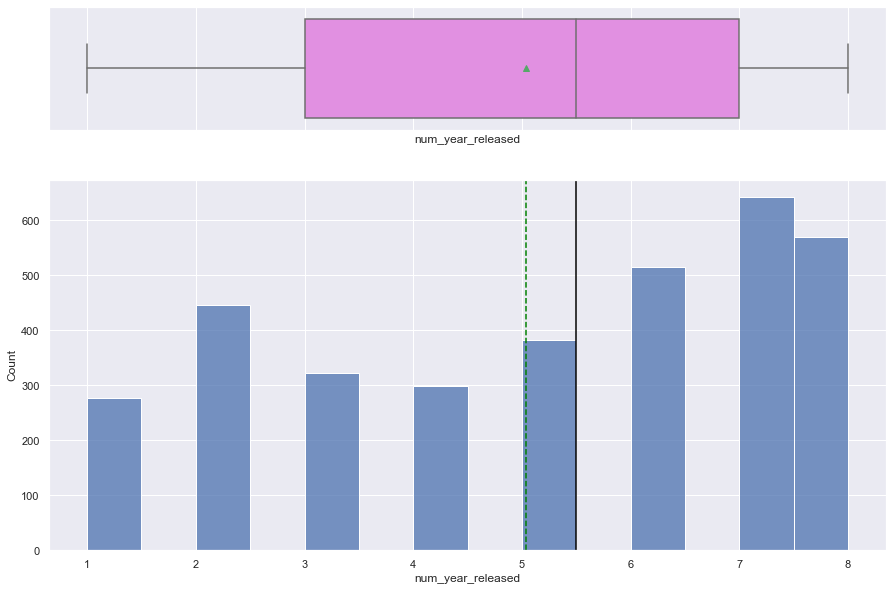

<IPython.core.display.Javascript object>

In [47]:
# lets look at the distribution of the num_year_released columns
histogram_boxplot(df, "num_year_released")

##### Outlier detection and treatment

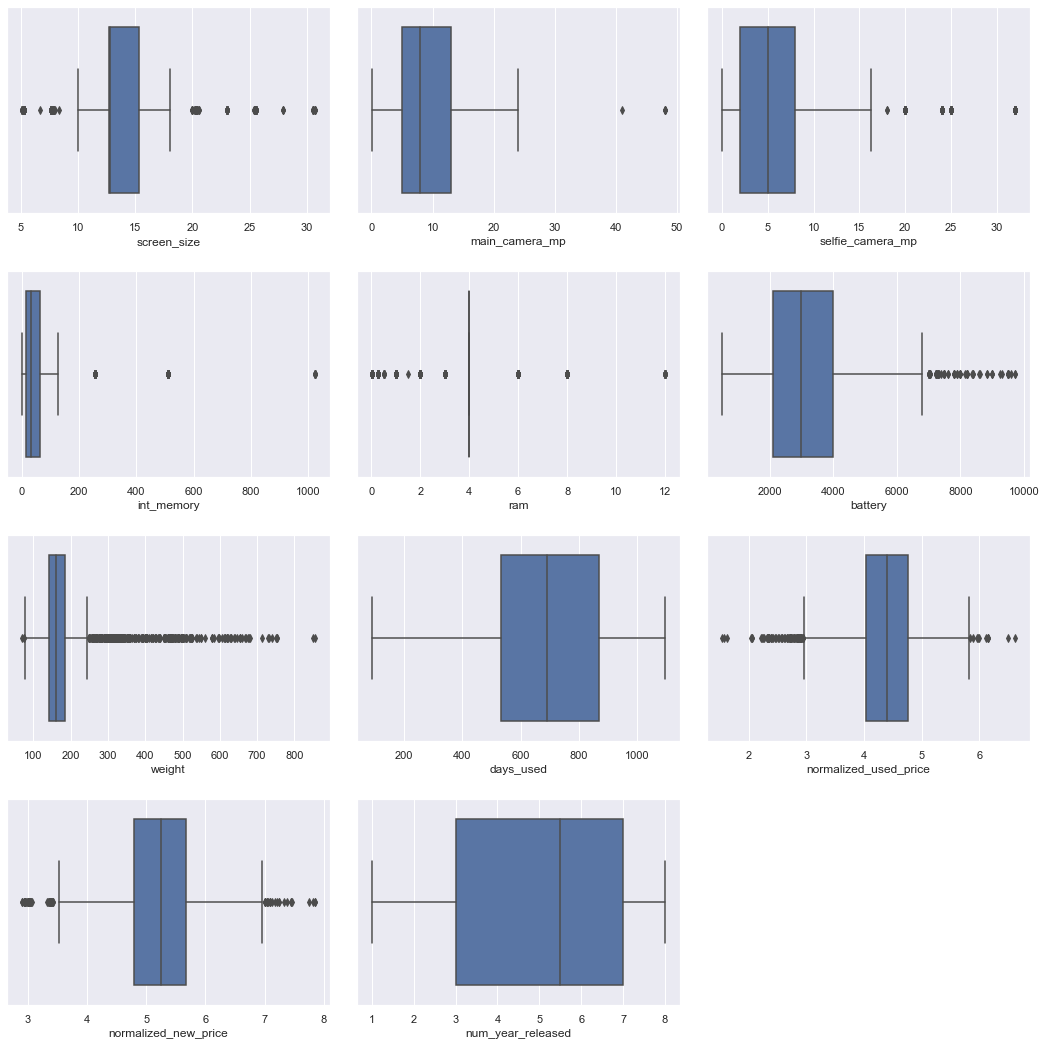

<IPython.core.display.Javascript object>

In [48]:
# outlier detection using boxplot
num_cols = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=df, x=variable)
    plt.tight_layout(pad=2)

plt.show()

- There are quite a handful of outliers in the data
- However, we will not treat them as they are proper values

### Data Preparation for Modeling

In [49]:
# Defining the independent and dependent variables

X = df.drop("normalized_used_price", axis=1)  # independent/Predictor variables
y = df["normalized_used_price"]  # dependent/Target variable

<IPython.core.display.Javascript object>

In [50]:
# Adding the intercept/constant to the data
#X = X.assign(const=1)
X = sm.add_constant(X)


<IPython.core.display.Javascript object>

In [51]:
# Creating dummy variables (one-hot encoding) for categorical featues in the data set

X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)
X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.715100,...,0,0,0,0,0,0,0,0,1,0
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.519018,...,0,0,0,0,0,0,0,0,1,1
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.884631,...,0,0,0,0,0,0,0,0,1,1
3,1.0,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.630961,...,0,0,0,0,0,0,0,0,1,1
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.947837,...,0,0,0,0,0,0,0,0,1,0


<IPython.core.display.Javascript object>

In [52]:
# Spliting the data into training and testing dataset

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1
)

<IPython.core.display.Javascript object>

In [53]:
# showing the number of rows of our training and testing data
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


<IPython.core.display.Javascript object>

## Model Building - Linear Regression

In [54]:
olsmodel = sm.OLS(y_train, x_train).fit()
print(olsmodel.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     268.7
Date:                   Tue, 14 Jun 2022   Prob (F-statistic):               0.00
Time:                           20:22:22   Log-Likelihood:                 123.85
No. Observations:                   2417   AIC:                            -149.7
Df Residuals:                       2368   BIC:                             134.0
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


<IPython.core.display.Javascript object>

## Model Performance Check

In [55]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [56]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, x_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.229884,0.180326,0.844886,0.841675,4.326841


<IPython.core.display.Javascript object>

In [57]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, x_test, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.238358,0.184749,0.842479,0.834659,4.501651


<IPython.core.display.Javascript object>

##### Observations

- The training R^2 is 0.84, so the model is not underfitting

- The train and test RMSE and MAE are comparable, so the model is not overfitting either

- MAE suggests that the model can predict the price within a mean error of 0.18 on the test data

- MAPE of 4.5 on the test data means that we are able to predict within 4.5% of the price

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

**The following are the linear regression assumptions I will check for**

- No Multicollinearity

- Linearity of variables

- Independence of error terms

- Normality of error terms

- No Heteroscedasticity

## 1. Test for Multicollinearity
We will test for multicollinearity using VIF

In [58]:
# Let's define a function to check VIF.


def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

<IPython.core.display.Javascript object>

In [59]:
VIF_train = checking_vif(x_train)  # Checking multicolliniaerity of x_train
VIF_train

,feature,VIF
0,const,227.744081
1,screen_size,7.677290
2,main_camera_mp,2.285051
3,selfie_camera_mp,2.812473
4,int_memory,1.364152
5,ram,2.282352
6,battery,4.081780
7,weight,6.396749
8,days_used,2.660269
9,normalized_new_price,3.119430


<IPython.core.display.Javascript object>

In [60]:
# Getting a list of column names with high VIF
VIF_train.drop(0, inplace=True)  # dropping the row ith the constant
High_VIF_col_list = []
for index, row in VIF_train.iterrows():
    if row["VIF"] > 5:
        High_VIF_col_list.append(row["feature"])

High_VIF_col_list

['screen_size',
 'weight',
 'brand_name_Apple',
 'brand_name_Huawei',
 'brand_name_Others',
 'brand_name_Samsung',
 'os_iOS']

<IPython.core.display.Javascript object>

In [61]:
# Writing a unction to treat multicollinearity


def treating_multicollinearity(
    predictors, target, high_vif_columns, initial_model_adj_rsquare
):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []
    adj_r2_diff = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

        # finding the difference between the new adj_r_square and the model adj_r_square
        adj_r2_diff.append(initial_model_adj_rsquare - olsmodel.rsquared_adj)

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
            "Change in Adj. R-squared": adj_r2_diff,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

<IPython.core.display.Javascript object>

In [62]:
# Calling the function
multiCol_value = treating_multicollinearity(x_train, y_train, High_VIF_col_list, 0.842)
multiCol_value

,col,Adj. R-squared after_dropping col,RMSE after dropping col,Change in Adj. R-squared
0,brand_name_Apple,0.841809,0.232201,0.000191
1,brand_name_Huawei,0.841808,0.232201,0.000192
2,brand_name_Others,0.841806,0.232203,0.000194
3,os_iOS,0.841795,0.232211,0.000205
4,brand_name_Samsung,0.841774,0.232227,0.000226
5,screen_size,0.838381,0.234703,0.003619
6,weight,0.838071,0.234928,0.003929


<IPython.core.display.Javascript object>

In [63]:
# I will start by dropping the screen_size column since the other columns affected are mostly dummy variables except screen_size and weight
col_to_drop = "screen_size"
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)]
x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  screen_size


,feature,VIF
0,const,202.673906
1,main_camera_mp,2.281835
2,selfie_camera_mp,2.809009
3,int_memory,1.362043
4,ram,2.282350
5,battery,3.842989
6,weight,2.993855
7,days_used,2.648929
8,normalized_new_price,3.077650
9,num_year_released,4.730315


<IPython.core.display.Javascript object>

- After dropping the screen_size column, the VIF of the weight columns dropped below 5
- Since the other VIF values greater than 5 are part of dummy variables, i will skip them for now. 


##### Next, I will rebuild the model using the updated set of predictors variables and look at p-values for feature elimination

In [64]:
olsmodel1 = sm.OLS(y_train, x_train2).fit()
print(olsmodel1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     267.7
Date:                   Tue, 14 Jun 2022   Prob (F-statistic):               0.00
Time:                           20:22:24   Log-Likelihood:                 97.950
No. Observations:                   2417   AIC:                            -99.90
Df Residuals:                       2369   BIC:                             178.0
Df Model:                             47                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


<IPython.core.display.Javascript object>

**Observations**

- We can see that adj. R-squared has dropped from 0.842 to 0.838, which shows that the dropped columns did not have much effect

  
**Checking the statistical significance of the independent features by testing the null hypothesis ($\beta_i = 0$)**
  - $H_o$ : Independent feature is not significant ($\beta_i = 0$)
  - $H_a$ : Independent feature is that it is significant ($\beta_i \neq 0$)
  
(P>|t|) is the p-value for each independent feature, to check that null hypothesis,  I will considering 0.05 (5%) as significance level.

In [65]:
# initial list of columns
predictors = x_train2.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'weight', 'normalized_new_price', 'num_year_released', 'brand_name_Karbonn', 'brand_name_Samsung', 'brand_name_Sony', 'brand_name_Xiaomi', 'os_Others', 'os_iOS', '4g_yes', '5g_yes']


<IPython.core.display.Javascript object>

In [66]:
# creating new train and test dataset with the new selected_features.
x_train3 = x_train2[selected_features]
x_test3 = x_test2[selected_features]

<IPython.core.display.Javascript object>

In [67]:
# building a new model with the updated training data
olsmodel2 = sm.OLS(y_train, x_train3).fit()
print(olsmodel2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     895.7
Date:                   Tue, 14 Jun 2022   Prob (F-statistic):               0.00
Time:                           20:22:24   Log-Likelihood:                 80.645
No. Observations:                   2417   AIC:                            -131.3
Df Residuals:                       2402   BIC:                            -44.44
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

<IPython.core.display.Javascript object>

In [68]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel2_train_perf = model_performance_regression(olsmodel2, x_train3, y_train)
olsmodel2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.23403,0.182751,0.83924,0.838235,4.395407


<IPython.core.display.Javascript object>

In [69]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel2_test_perf = model_performance_regression(olsmodel2, x_test3, y_test)
olsmodel2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.241434,0.186649,0.838387,0.836013,4.556349


<IPython.core.display.Javascript object>

**Observations**

* No feature has p-value greater than 0.05, so we'll consider the features in *x_train3* as the final set of predictor variables and *olsmodel2* as the final model to move forward with.
* Adjusted R-squared is 0.838, i.e., our model is able to explain ~84% of the variance
* RMSE and MAE values are comparable for train and test sets, indicating that the model is not overfitting

### TEST FOR LINEARITY AND INDEPENDENCE

In [70]:
# creating a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmodel2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmodel2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.867319,0.220169
1525,4.448399,4.602001,-0.153602
1128,4.315353,4.286957,0.028395
3003,4.282068,4.195169,0.086899
2907,4.456438,4.490563,-0.034125


<IPython.core.display.Javascript object>

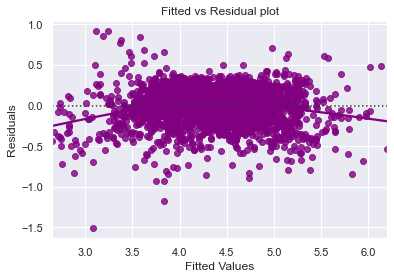

<IPython.core.display.Javascript object>

In [71]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

* There is no pattern in the plot above. Hence, the assumptions of linearity and independence are satisfied.

### TEST FOR NORMALITY

The following test will be used to test for normality of the residuals
- Histogram plot of the residuals
- Q-Q plot
- Shapiro-Wilk test

**Histogram plot of the residuals**

* The shape of the histogram of residuals give an initial idea about the normality.

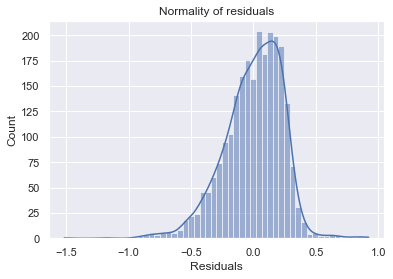

<IPython.core.display.Javascript object>

In [72]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

* The histogram of residuals almost has a bell shape structure

**Q-Q plot**

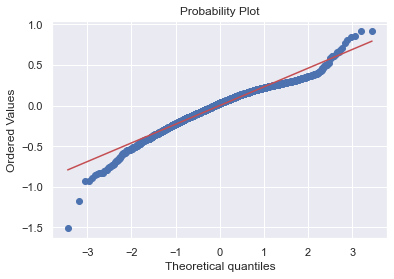

<IPython.core.display.Javascript object>

In [73]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

- The residuals more or less follow a straight line except for the tails.


**Shapiro-Wilk test**


   - Null hypothesis: Residuals are normally distributed
   - Alternate hypothesis: Residuals are not normally distributed

In [74]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9676972031593323, pvalue=6.995328206686811e-23)

<IPython.core.display.Javascript object>

- Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test.
- Strictly speaking, the residuals are not normal.
- However, as an approximation, I can accept this distribution as close to being normal.


### TEST FOR HOMOSCEDASTICITY

* The goldfeldquandt test will be used for this test. If we get a p-value > 0.05 we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic.
    - $H_0$ : Residuals are homoscedastic
    - $H_a$: Residuals have heteroscedasticity

In [75]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train3)
lzip(name, test)

[('F statistic', 1.008750419910676), ('p-value', 0.4401970650667301)]

<IPython.core.display.Javascript object>

- Since p-value > 0.05, we can say that the residuals are homoscedastic. So, this assumption is satisfied.

## Final Model

recreating the final model and printing it's summary to gain insights.

In [76]:
x_train_final = x_train3.copy()
x_test_final = x_test3.copy()

<IPython.core.display.Javascript object>

In [77]:
# Final model with summary
olsmodel_final = sm.OLS(y_train, x_train_final).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     895.7
Date:                   Tue, 14 Jun 2022   Prob (F-statistic):               0.00
Time:                           20:22:28   Log-Likelihood:                 80.645
No. Observations:                   2417   AIC:                            -131.3
Df Residuals:                       2402   BIC:                            -44.44
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

<IPython.core.display.Javascript object>

In [78]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(
    olsmodel_final, x_train_final, y_train
)
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.23403,0.182751,0.83924,0.838235,4.395407


<IPython.core.display.Javascript object>

In [79]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(
    olsmodel_final, x_test_final, y_test
)
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.241434,0.186649,0.838387,0.836013,4.556349


<IPython.core.display.Javascript object>

* The model is able to explain ~84% of the variation in the data

* The train and test RMSE and MAE are low and comparable. So, our model is not suffering from overfitting

* The MAPE on the test set suggests we can predict within 4.5% of the used device price

* Hence, we can conclude the model *olsmodel_final* is good for prediction as well as inference purposes

In [80]:
# Let us write the equation of linear regression
print("THE FINAL LINEAR EQUATION is:")
print("")
Equation = "normalized_used_price ="
print(Equation, end=" ")
for i in range(len(x_train_final.columns)):
    if i == 0:
        print(olsmodel_final.params[i], "+", end=" ")
    elif i != len(x_train_final.columns) - 1:
        print(
            "(",
            olsmodel_final.params[i],
            ")*(",
            x_train_final.columns[i],
            ")",
            "+",
            end=" ",
        )
    else:
        print("(", olsmodel_final.params[i], ")*(", x_train_final.columns[i], ")")

THE FINAL LINEAR EQUATION is:

normalized_used_price = 1.4999812451972667 + ( 0.020967228790753144 )*( main_camera_mp ) + ( 0.013827288876828447 )*( selfie_camera_mp ) + ( 0.020712701657147572 )*( ram ) + ( 0.0016616476692227985 )*( weight ) + ( 0.4414723002236374 )*( normalized_new_price ) + ( -0.02916976367153875 )*( num_year_released ) + ( 0.11559844506476102 )*( brand_name_Karbonn ) + ( -0.037423299340728716 )*( brand_name_Samsung ) + ( -0.0669928513011166 )*( brand_name_Sony ) + ( 0.08006840695804301 )*( brand_name_Xiaomi ) + ( -0.1275751256189791 )*( os_Others ) + ( -0.09000552317648913 )*( os_iOS ) + ( 0.05021345152978367 )*( 4g_yes ) + ( -0.06725868426972137 )*( 5g_yes )


<IPython.core.display.Javascript object>

## Observation

* The model is able to explain ~84% of the variation in the data

* The train and test RMSE and MAE are low and comparable. So, our model is not suffering from overfitting

* The MAPE on the test set suggests we can predict within 4.5% of the price

* Hence, the model *olsmodel_final* is good for prediction as well as inference purposes

## Actionable Insights and Recommendations 

- The model is able to explain ~84% of the variation in the data and within 4.5% of the used price on the test data, which is good
    - This indicates that the model is good for prediction as well as inference purposes
    

- If the resolution of the rear camera of the used device increases by one unit, then price of the device increases by 0.0210 units, all other variables held constant


- If the  resolution of the front camera of the used device increases by one unit, then price of the device increases by 0.0138 units, all other variables held constant


- If the amount of RAM of the used device increases by one unit, then price of the device increases by 0.0207 units, all other variables held constant

- If the weight of the used device increases by one unit, then price of the device increases by 0.0017 units, all other variables held constant

- If the price of a new device of the same model as the used device increases by one unit, then price of the device increases by 0.4415 units, all other variables held constant

- The  price for IOS devices will be 0.0900 units less than the price of Android devices


- The following features should be focused on, when trying to predict the price of a used device. Resolution of the rear camera, Resolution of the front camera, Amount of RAM, weight of the device, price of a new device of the same model, and the number of years since relased.



___

### Conclusion based on descriptive statistics, EDA and visualization

- There are 3454 rows and 15 columns in our dataset
- Most of the columns in the data are numeric in nature ('int64' or 'float64' type).
- The brand_name, os, 4g and 5g columns are categorical ('object' type).
- There are no duplicate values in the dataset
- About 50% of the devices has front camera resolution between 2 megapixel and 8 mega pixel with a median value of 5 megapixel
- About 50% of the devices has rear camera resolution between 5 megapixel and 13 mega pixel with a median value of 8 megapixel
- Almost half of the devices batteries are less than 3000mAh.
- The average RAM of the devices is 4GB
- The average weight of the devices is 182.8 grams
- about 50% of the devices has front camera resolution between 142grams and 185grams 
- The distribution of the normalized_new_price column is close to a normal distribution except for the left tail
- The distribution of the normalized_used_price column is close to a normal distribution
- About 93.1% of the devises have Android operating system
- 67.6% of devices in the data has 4g
- Only 4.4% of devices in the dataset has 5g
- The majority of the devices 18.6% ere released in 2014
- The battery, RAM, front camera, rear camera, normalized_new_price, and screen size all have strong correlation with normalized_used_price 
- There is a strong positive correlation (0.81) between battery and the screen size
- There is a strong positive correlation(0.83) between weight and the screen size
- The Samsung brands have the highest weight
- The Huawei brands have the highest number of large screen size devices
- The Huawei brands have the highest number of high-quality front camera
- The Sony brands have the highest number of high quality front camera
- The normalized_used_price increases and the release year increases
- Devices with 5g are more expensive than the devises without 5g
- Devices with 4g are more expensive than the devises without 4g

# The End !!!